In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
movies = pd.read_csv('../Data/clean.csv')
movies.head()

,Unnamed: 0,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,0,The Shining,4.0,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,1,The Blue Lagoon,4.0,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,2,Star Wars: Episode V - The Empire Strikes Back,2.0,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,3,Airplane!,2.0,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,4,Caddyshack,4.0,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [36]:
movies.shape

(7475, 17)

In [37]:
movies.dtypes

Unnamed: 0      int64
name           object
rating        float64
genre          object
year            int64
released       object
score         float64
votes         float64
director       object
writer         object
star           object
country        object
budget        float64
gross         float64
company        object
runtime       float64
month          object
dtype: object

In [38]:
movies = movies.drop(columns ='Unnamed: 0')

In [39]:
movies.shape

(7475, 16)

In [40]:
movies.isnull().sum()

name           0
rating        53
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2040
gross          0
company        0
runtime        1
month          0
dtype: int64

In [41]:
movies.dtypes

name         object
rating      float64
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
month        object
dtype: object

In [42]:
movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'month'],
      dtype='object')

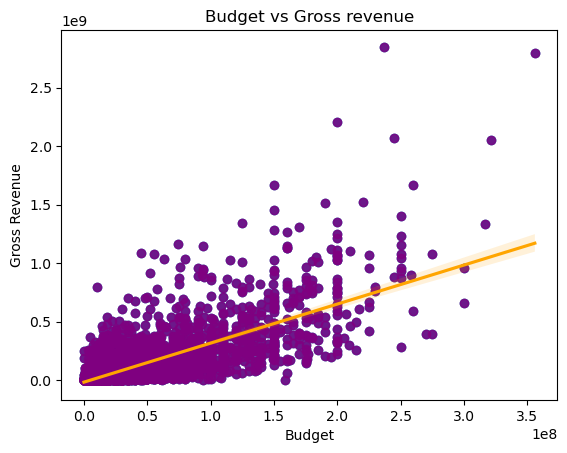

In [43]:
# Scatter plot with Budget vs Gross revenue

plt.scatter(x = movies['budget'], y = movies['gross'])
plt.title('Budget vs Gross revenue')

# Regression line
sns.regplot(x = 'budget', y = 'gross', data = movies, scatter_kws = {'color' : 'purple'}, line_kws = {'color' : 'orange'})
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.savefig('../Images/budget_Vs_Gross_revenue.png', dpi = 192);

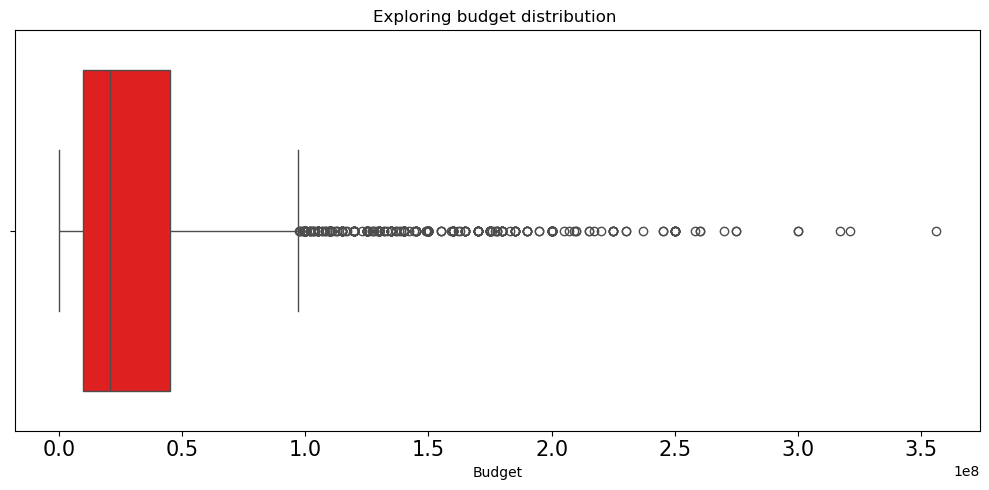

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = movies['budget'], color = 'r')
plt.title('Exploring budget distribution ')
plt.xlabel('Budget')
plt.xticks(fontsize=15)
plt.tight_layout()

plt.savefig('../Images/exploring_budget_distribution.png', dpi = 192);

Above  boxplot shows outliers which impacts the mean so median can be used for imputation

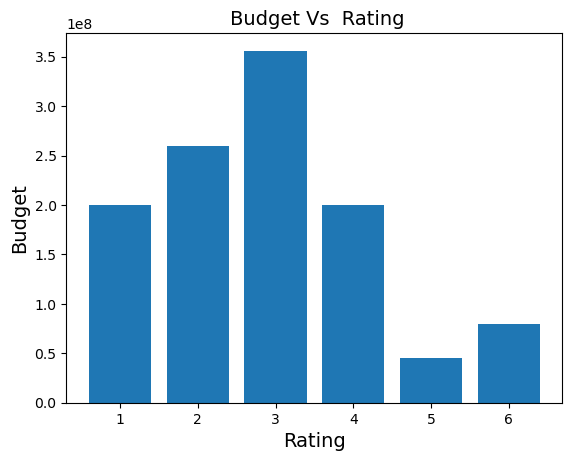

In [45]:
plt.bar(movies['rating'], movies['budget'])
plt.title(f' Budget Vs  Rating',fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Budget', fontsize=14);

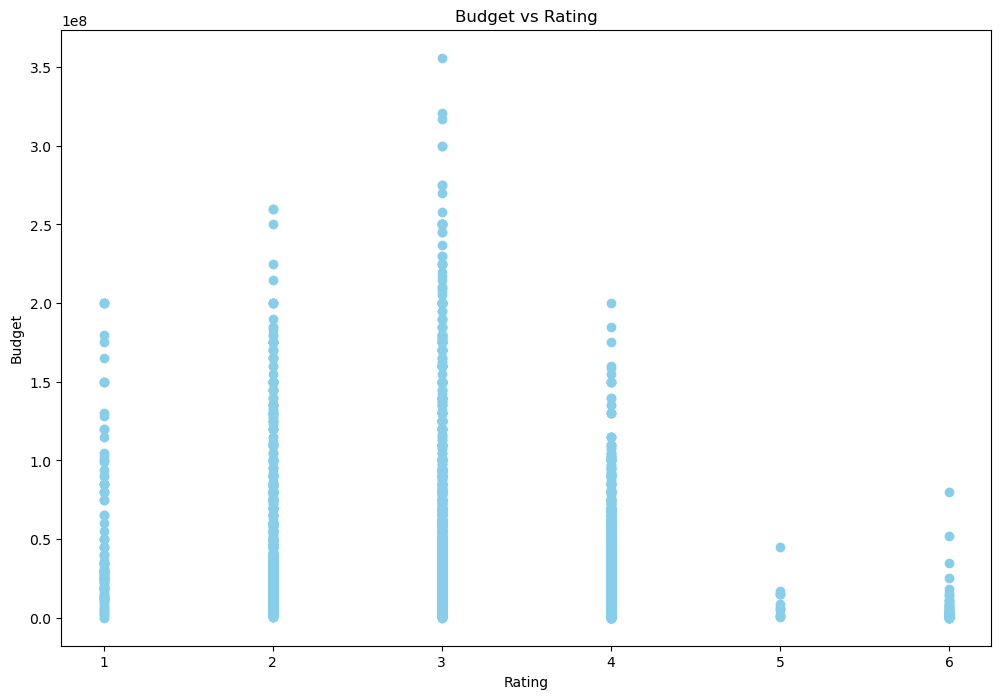

In [46]:
## scatter plot of 'budget' vs 'rating'
plt.figure(figsize=(12, 8))
plt.scatter(movies['rating'], movies['budget'], color='skyblue')
plt.title('Budget vs Rating')
plt.xlabel('Rating')
plt.ylabel('Budget')
plt.show()

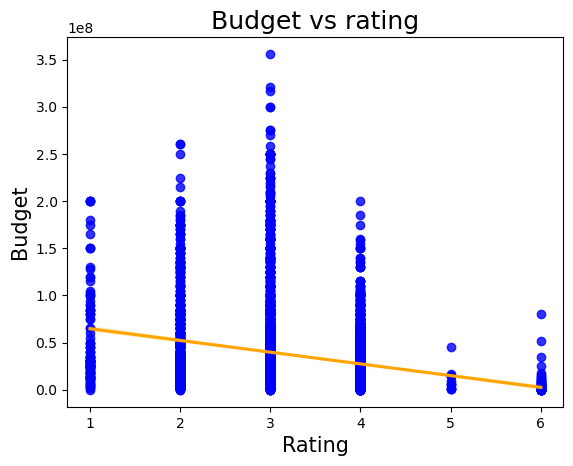

In [47]:
#Regplot budget VS Rating
sns.regplot(data= movies, x='rating', y='budget', scatter_kws={'color':'blue'},line_kws={'color':'orange'} )
plt.title('Budget vs rating', fontsize=18)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.savefig('../Images/regplot_budget_rating.png', dpi = 192);

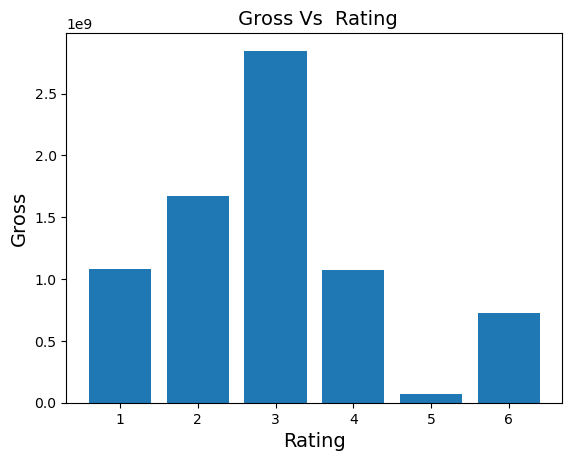

In [48]:
plt.bar(movies['rating'], movies['gross'])
plt.title(f' Gross Vs  Rating',fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Gross', fontsize=14);
plt.savefig('../Images/regplot_gross_rating.png', dpi = 192)

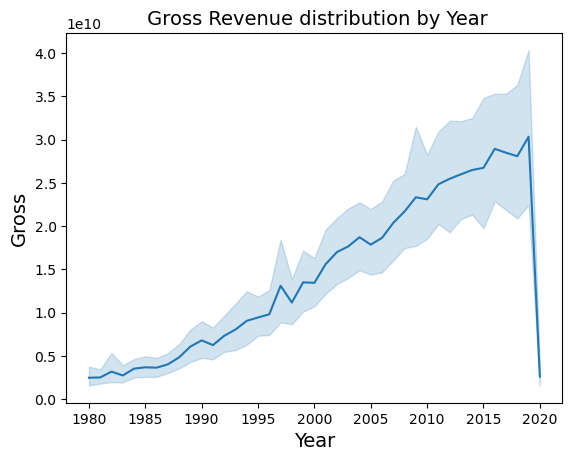

In [49]:
#Gross revenue over years
sns.lineplot(x='year', y='gross', data = movies , 
             estimator = np.sum
            );
plt.title(f' Gross Revenue distribution by Year',fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gross', fontsize=14);

plt.savefig('../Images/gross_revenue_over_years.png', dpi = 192)

From above line plot we can see there is a sharp decline in the gross revenue in 2020  due to covid-19 pandamic

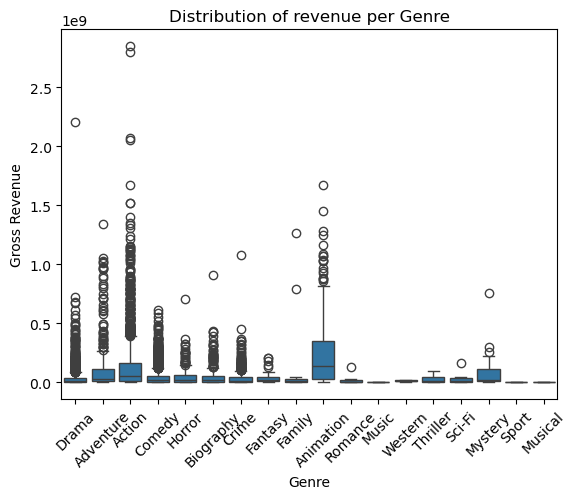

In [50]:
sns.boxplot(x='genre', y='gross', data = movies)
plt.xticks(rotation = 45)
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.title('Distribution of revenue per Genre');
plt.savefig('../Images/revenue_distribution_per_genre.png', dpi = 192)

The Action genre showing high revenue with lots of outliers indicating number of successful movies in this genre

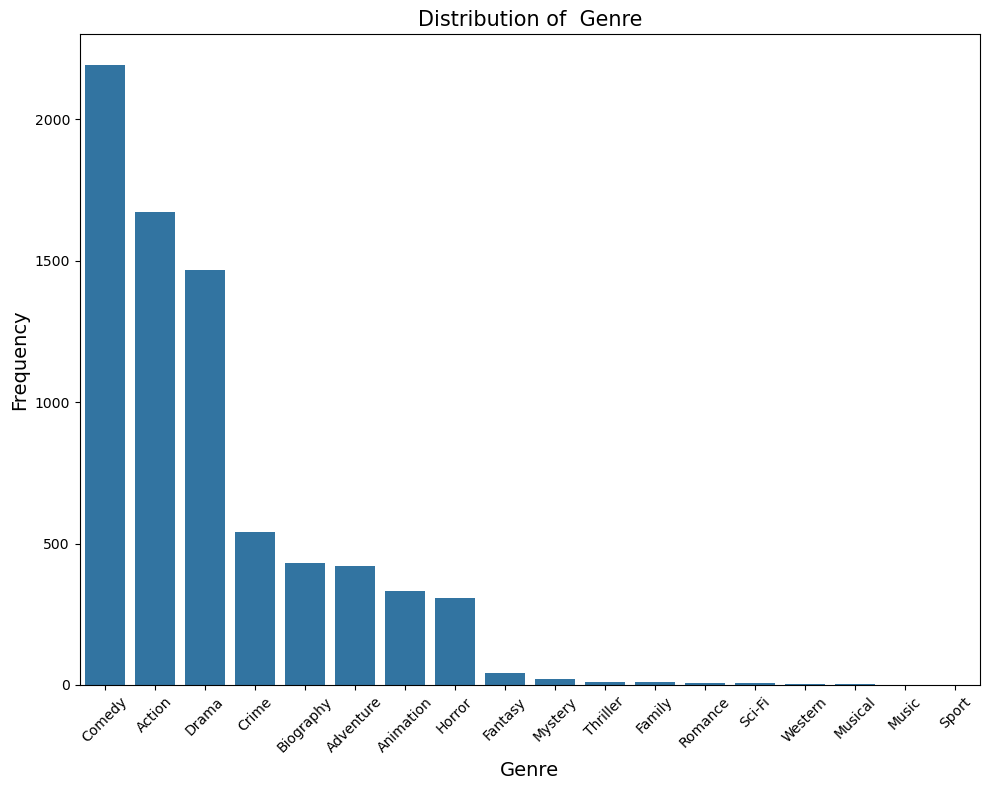

<Figure size 640x480 with 0 Axes>

In [51]:
genre_counts = movies['genre'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.countplot(x='genre', data=movies, order=genre_counts.index, )
plt.title('Distribution of  Genre', fontsize=15)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('../Images/genre_distribution.png', dpi = 192);

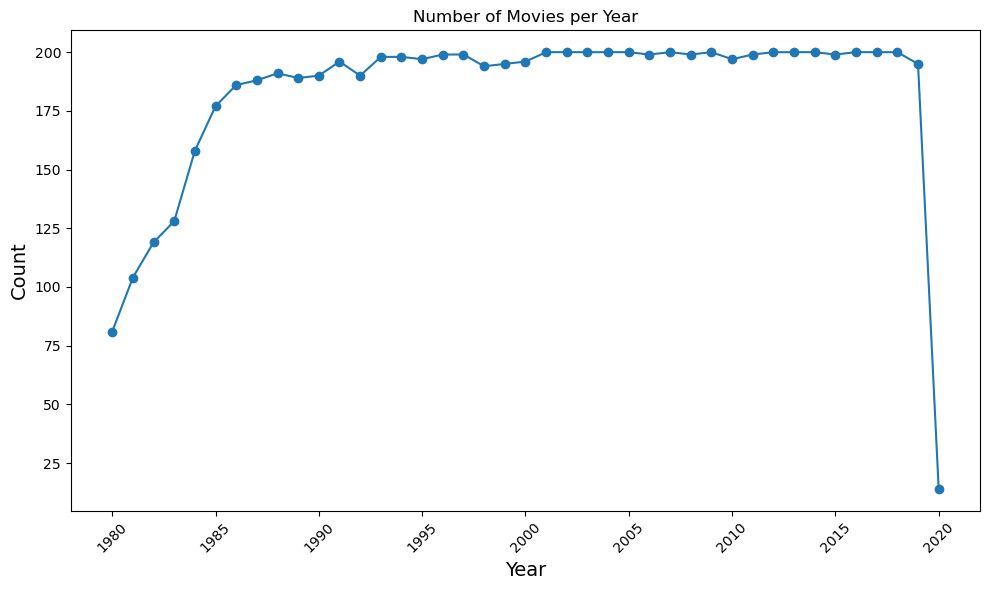

<Figure size 640x480 with 0 Axes>

In [52]:
cnt_year = movies['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(cnt_year.index, cnt_year.values, marker='o')
plt.title('Number of Movies per Year')
plt.xlabel('Year', fontsize=14 )
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('../Images/number_of_movies_per_year.png', dpi = 192);

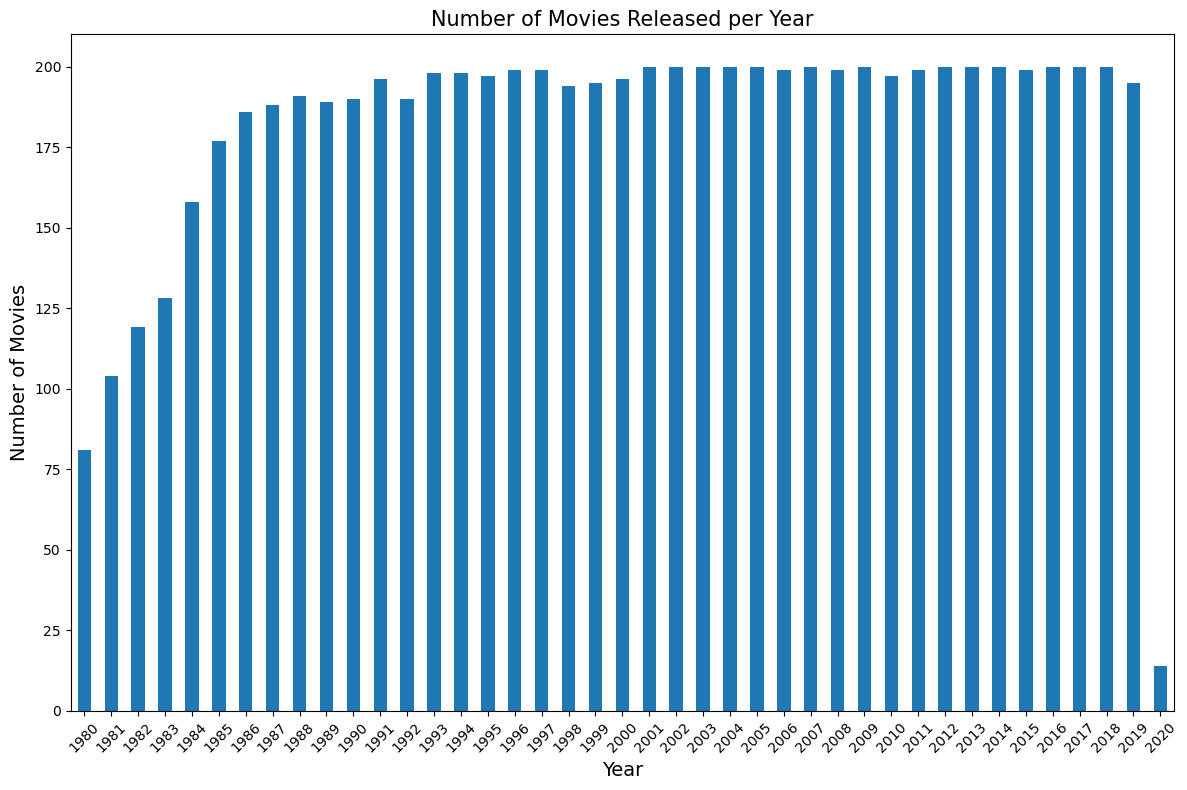

<Figure size 640x480 with 0 Axes>

In [53]:
movies_per_year = movies['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 8))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released per Year', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('../Images/barplot_number_of_movies_per_year.png', dpi = 192);

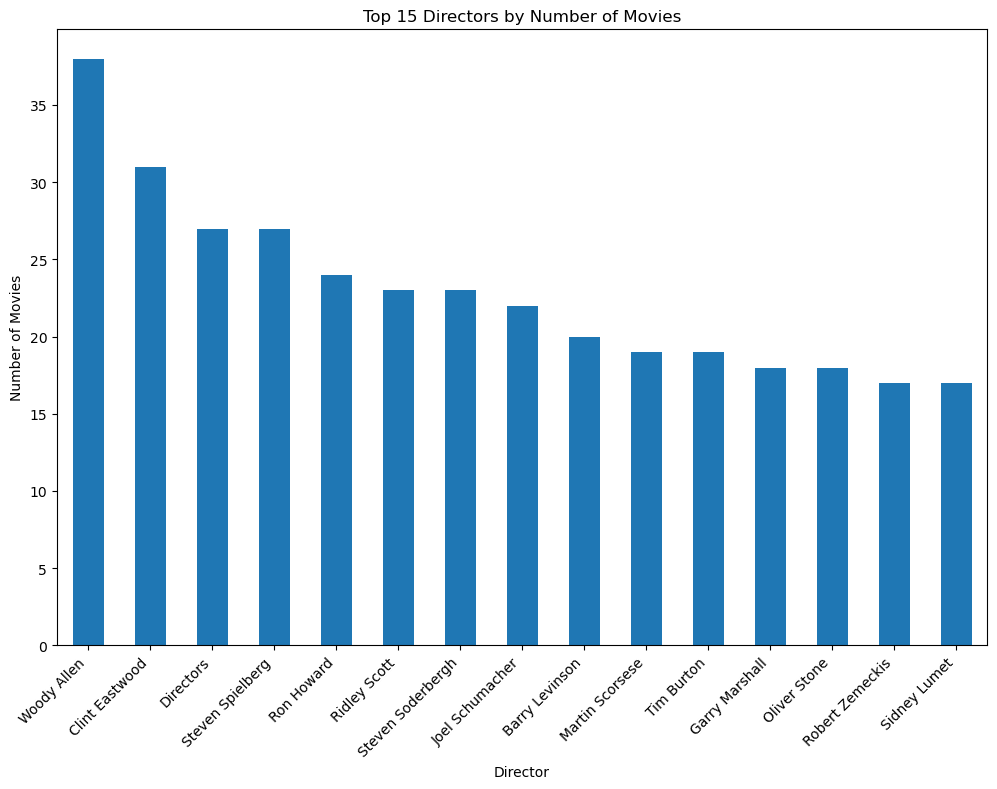

In [54]:
director_cnt = movies['director'].value_counts().head(15)
plt.figure(figsize=(12,8))
director_cnt.plot(kind ='bar')
plt.title('Top 15 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45, ha ='right')
plt.show()
          


#### Woody Allen has directed most movies so far

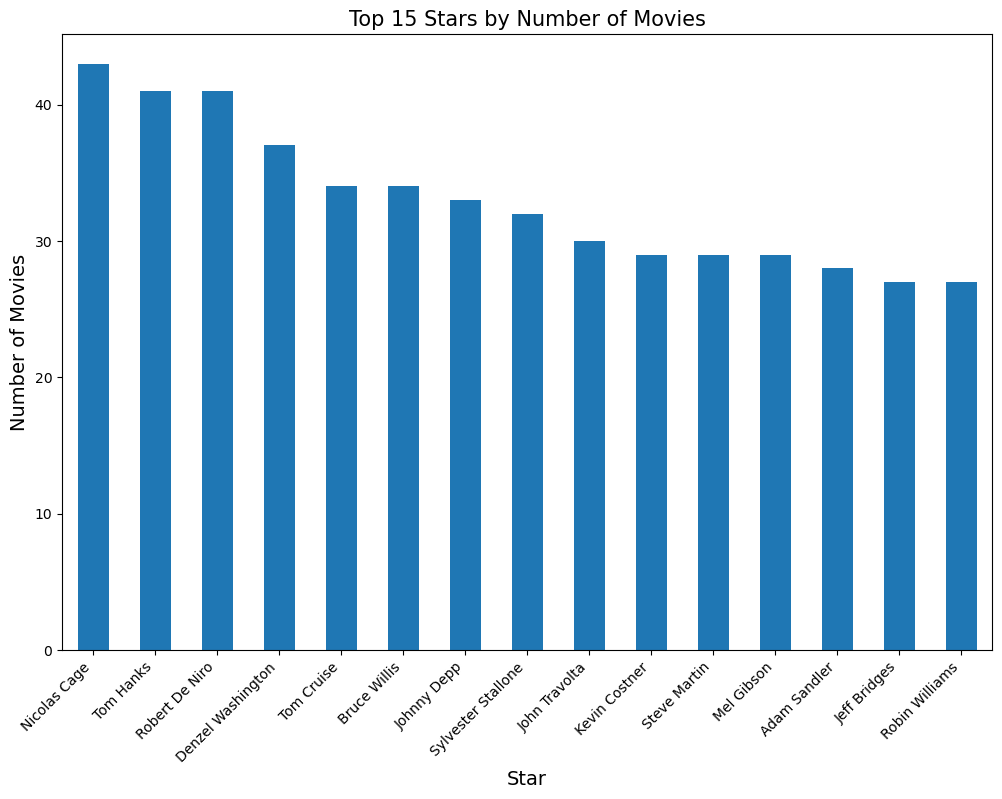

<Figure size 640x480 with 0 Axes>

In [55]:
#top 15 stars by number of movies

star_cnt = movies['star'].value_counts().head(15)
plt.figure(figsize=(12,8))
star_cnt.plot(kind ='bar')
plt.title('Top 15 Stars by Number of Movies', fontsize = 15)
plt.xlabel('Star', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)
plt.xticks(rotation = 45, ha ='right')
plt.show()
plt.savefig('../Images/distribution_of_movies_by_directors.png', dpi = 192);

#### Nicolas Cage has starred the most movies so far

<Figure size 1500x1500 with 0 Axes>

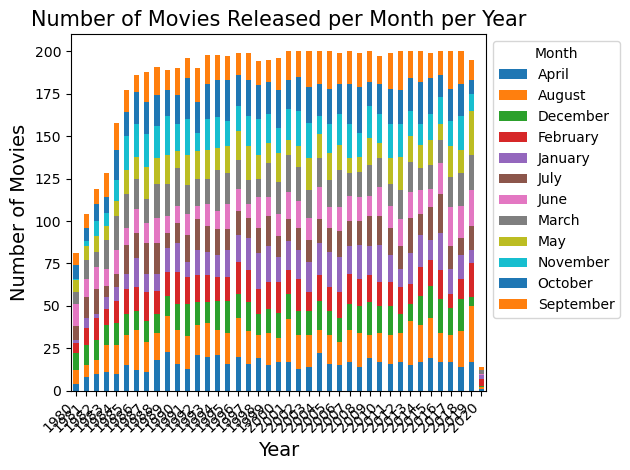

<Figure size 640x480 with 0 Axes>

In [56]:
movies_per_month_per_year = movies.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 15))
movies_per_month_per_year.plot(kind='bar', stacked=True)
plt.title('Number of Movies Released per Month per Year',fontsize = 15 )
plt.xlabel('Year', fontsize =14)
plt.ylabel('Number of Movies', fontsize =14)
plt.legend(title='Month',bbox_to_anchor=(1, 1))

plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.show()
plt.savefig('../Images/distribution_of_movies_per_month_per_year.png', dpi = 192);   

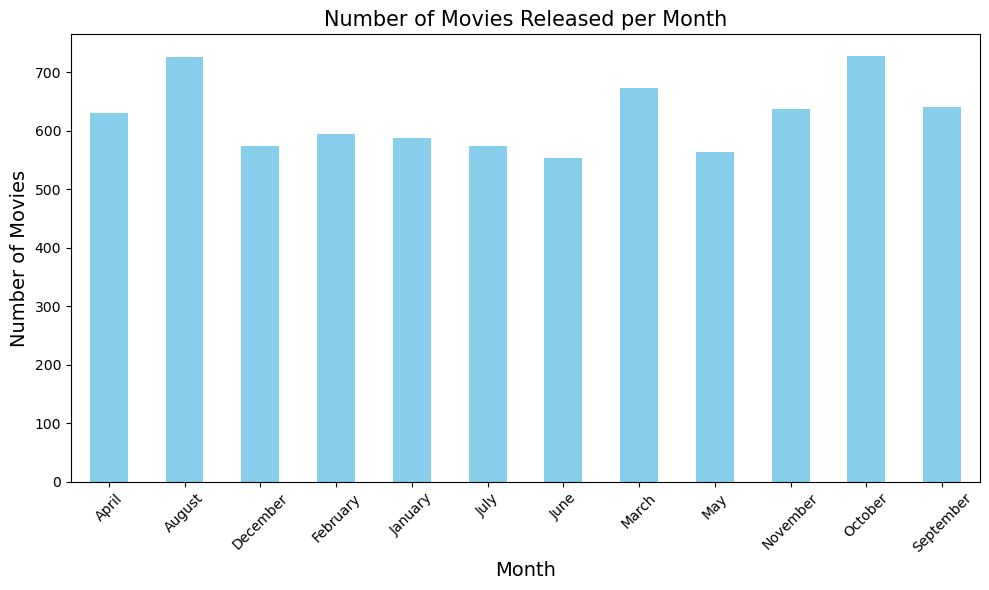

<Figure size 640x480 with 0 Axes>

In [58]:
movies_per_month = movies['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
movies_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Month',  fontsize = 15)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Movies',  fontsize = 14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('../Images/number_of_movies_per_month.png', dpi = 192);

#### Most of the movies are released around August, October, March and September

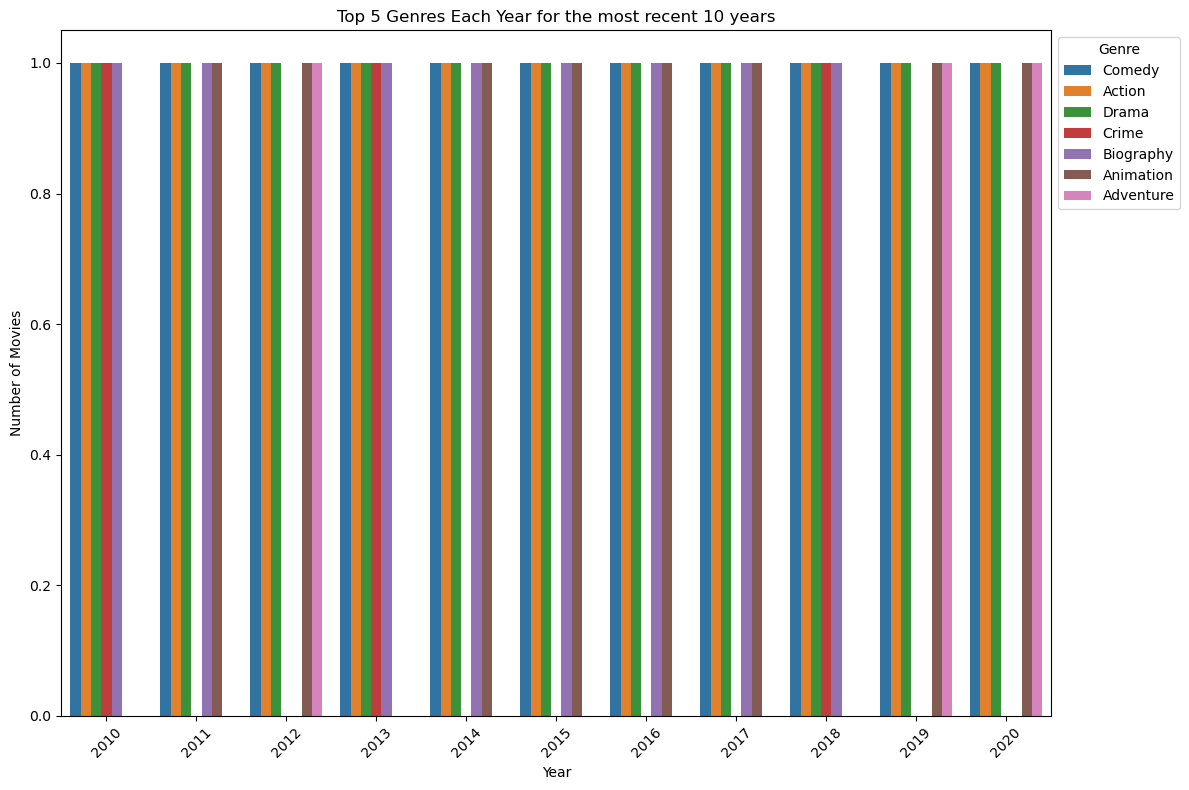

In [59]:
most_recent_10_yrs = movies[movies['year'] >= (movies['year'].max() - 10)]

# Group by year and genre, and count the occurrences of each genre
genre_counts_per_year = most_recent_10_yrs.groupby(['year', 'genre']).size().reset_index(name='count')

# Find the top 5 genres for each year
top_5_genres_per_year = genre_counts_per_year.groupby('year').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plotting
sns.countplot(x='year', hue='genre', data=top_5_genres_per_year)
plt.title('Top 5 Genres Each Year for the most recent 10 years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


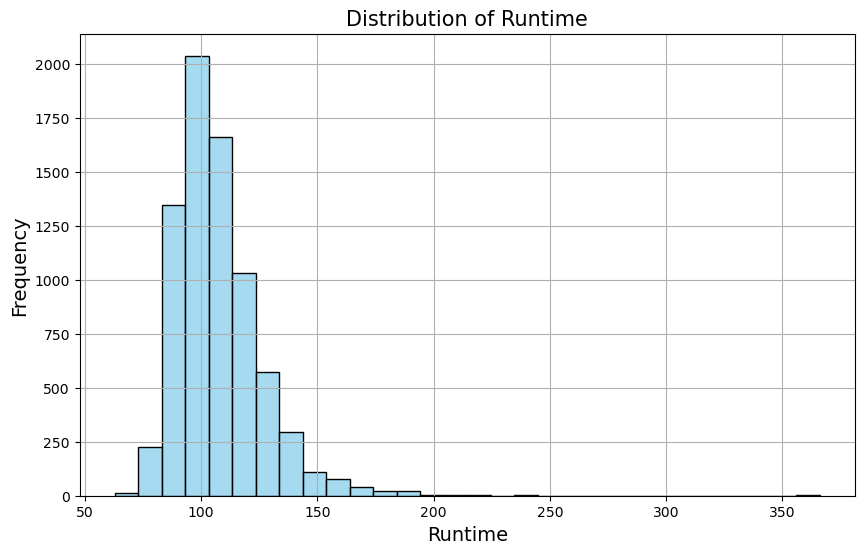

<Figure size 640x480 with 0 Axes>

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['runtime'],bins=30, color='skyblue' )
plt.title('Distribution of Runtime', fontsize =15)
plt.xlabel('Runtime', fontsize =14)
plt.ylabel('Frequency', fontsize =14)
plt.grid(True)
plt.show()
plt.savefig('../Images/distribution_of_movies_runtime.png', dpi = 192);

Above plot shows majority of movies have run time of around 100 minutes. there are very few movies with shorter runtimr and very longer runtime

C:\Users\david\AppData\Local\Temp\ipykernel_4564\298249101.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_per_star.values, y=avg_gross_per_star.index, palette= 'coolwarm')


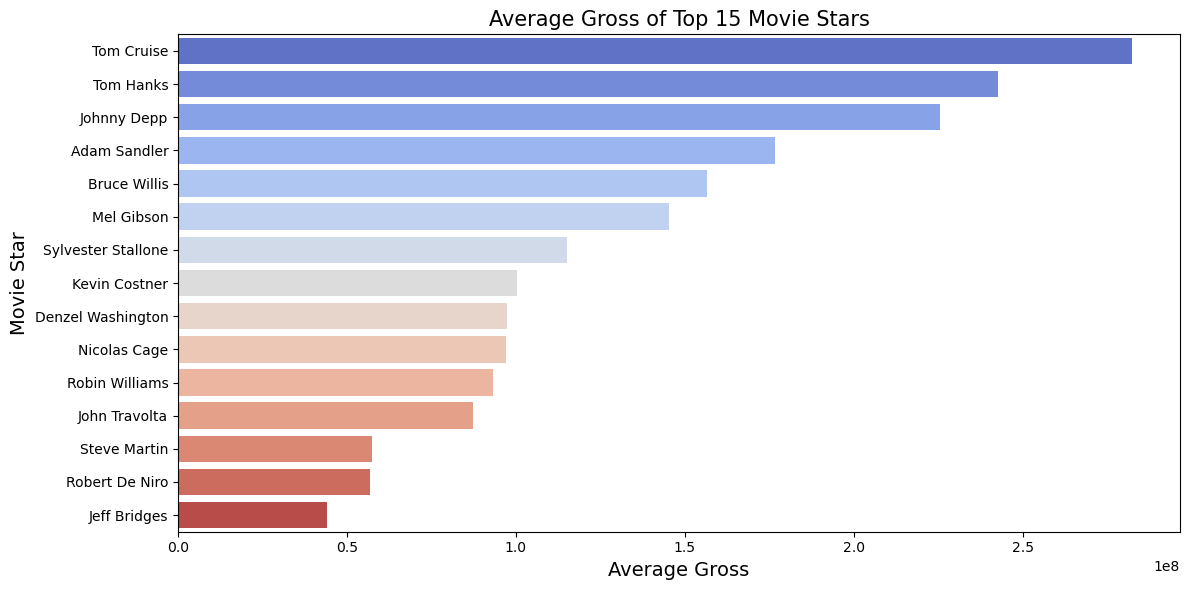

<Figure size 640x480 with 0 Axes>

In [63]:
# get the top 15 movie stars by number of movies
top_15_stars = movies['star'].value_counts().head(15).index

# Filter the dataframe for only the movies starred by the top 15 stars
top_15_movies = movies[movies['star'].isin(top_15_stars)]

# Group by star and calculate the average gross
avg_gross_per_star = top_15_movies.groupby('star')['gross'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_gross_per_star.values, y=avg_gross_per_star.index, palette= 'coolwarm')
plt.title('Average Gross of Top 15 Movie Stars', fontsize = 15)
plt.xlabel('Average Gross', fontsize = 14)
plt.ylabel('Movie Star', fontsize = 14)
plt.tight_layout()
plt.show()
plt.savefig('../Images/Avg_gross_revenue_top15_stars.png', dpi = 192); 

#### Star Tom cruise's movie have that highest gross revenue followed by Tom Hanks

C:\Users\david\AppData\Local\Temp\ipykernel_4564\153605689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_per_dir.values, y=avg_gross_per_dir.index, palette= 'coolwarm')


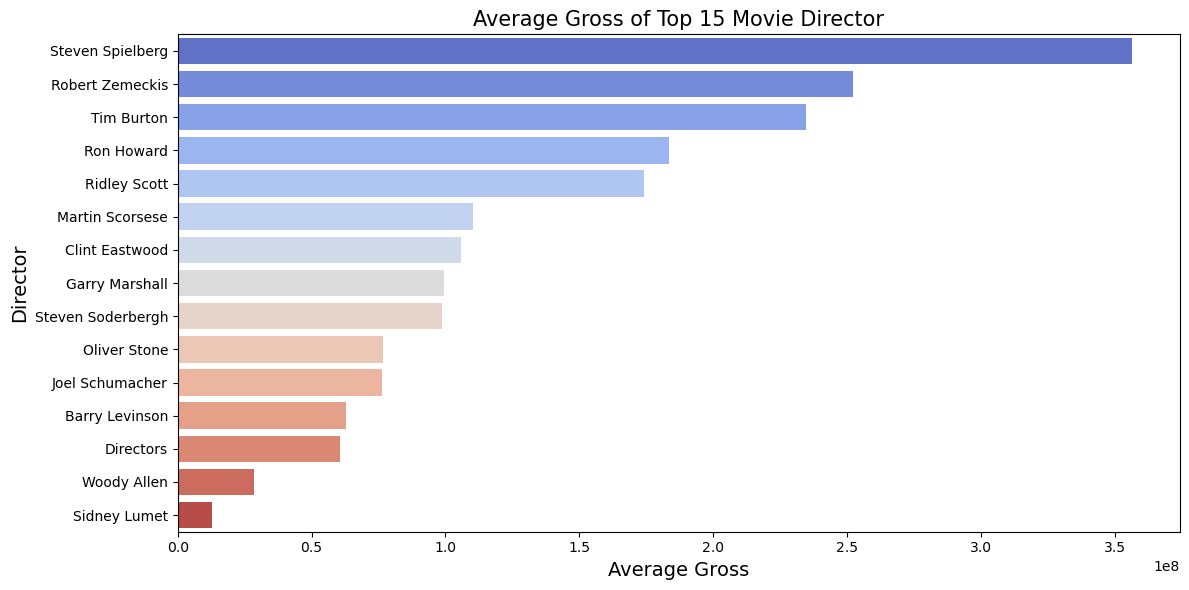

<Figure size 640x480 with 0 Axes>

In [64]:
# get the top 15 movie director by number of movies
top_15_stars = movies['director'].value_counts().head(15).index

# Filter the dataframe for only the movies starred by the top 15 stars
top_15_movies = movies[movies['director'].isin(top_15_stars)]

# Group by star and calculate the average gross
avg_gross_per_dir = top_15_movies.groupby('director')['gross'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_gross_per_dir.values, y=avg_gross_per_dir.index, palette= 'coolwarm')
plt.title('Average Gross of Top 15 Movie Director', fontsize = 15)
plt.xlabel('Average Gross', fontsize = 14)
plt.ylabel('Director', fontsize = 14)
plt.tight_layout()
plt.show() 
plt.savefig('../Images/Avg_gross_revenue_top15_Directors.png', dpi = 192);

#### Director Steven Spielberg's movies have that highest gross revenue 

C:\Users\david\AppData\Local\Temp\ipykernel_4564\1748098108.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_per_writer.values, y=avg_gross_per_writer.index, palette= 'coolwarm')


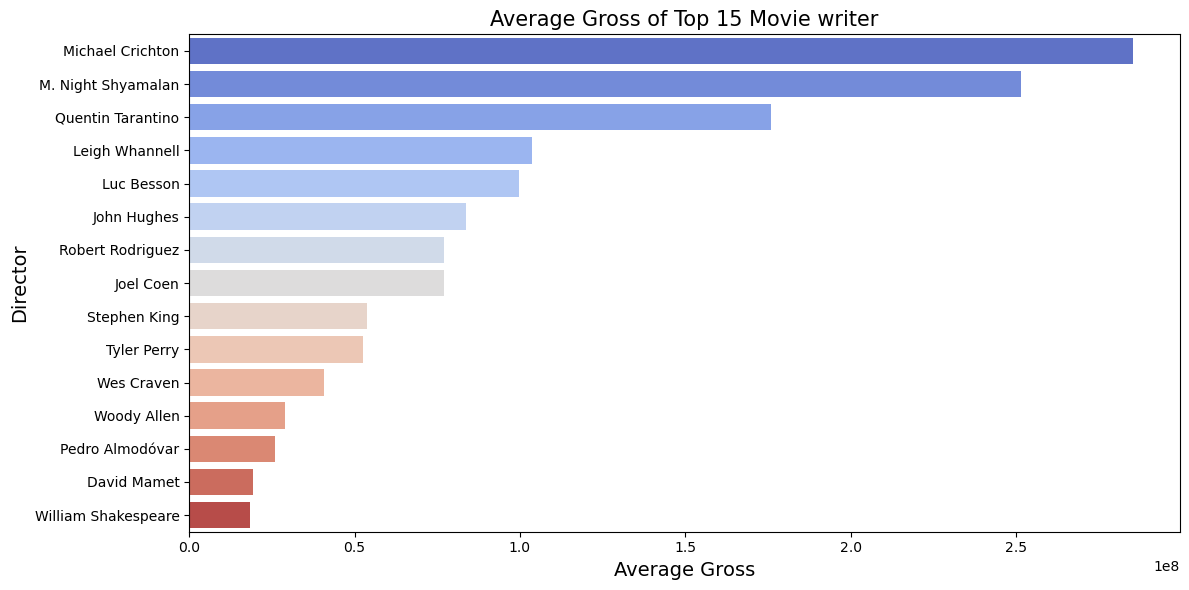

<Figure size 640x480 with 0 Axes>

In [65]:
# get the top 15 movie stars by number of movies
top_15_writer = movies['writer'].value_counts().head(15).index

# Filter the dataframe for only the movies starred by the top 15 stars
top_15_movies = movies[movies['writer'].isin(top_15_writer)]

# Group by star and calculate the average gross
avg_gross_per_writer = top_15_movies.groupby('writer')['gross'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_gross_per_writer.values, y=avg_gross_per_writer.index, palette= 'coolwarm')
plt.title('Average Gross of Top 15 Movie writer', fontsize = 15)
plt.xlabel('Average Gross', fontsize = 14)
plt.ylabel('Director', fontsize = 14)
plt.tight_layout()
plt.show()
plt.savefig('../Images/Avg_gross_revenue_top15_writers.png', dpi = 192);

#### Michael Crichon's movies have that highest gross revenue followed by M. Night Shyamalan

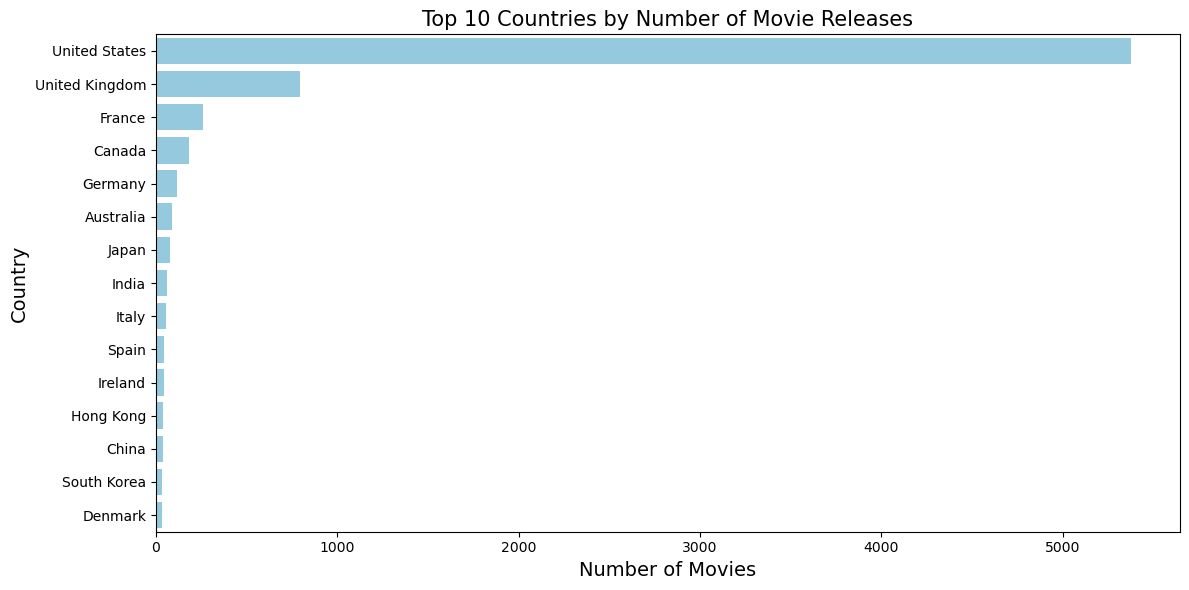

<Figure size 640x480 with 0 Axes>

In [66]:
# Get the top 10 countries by number of movie releases
top_15_countries = movies['country'].value_counts().head(15)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=movies, order=top_15_countries.index, color ='skyblue')
plt.title('Top 10 Countries by Number of Movie Releases', fontsize = 15)
plt.xlabel('Number of Movies', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.tight_layout()
plt.show()
plt.savefig('../Images/top_10_Countries_by_number_movies.png', dpi = 192);

#### We see United States is the most movie producing country so far

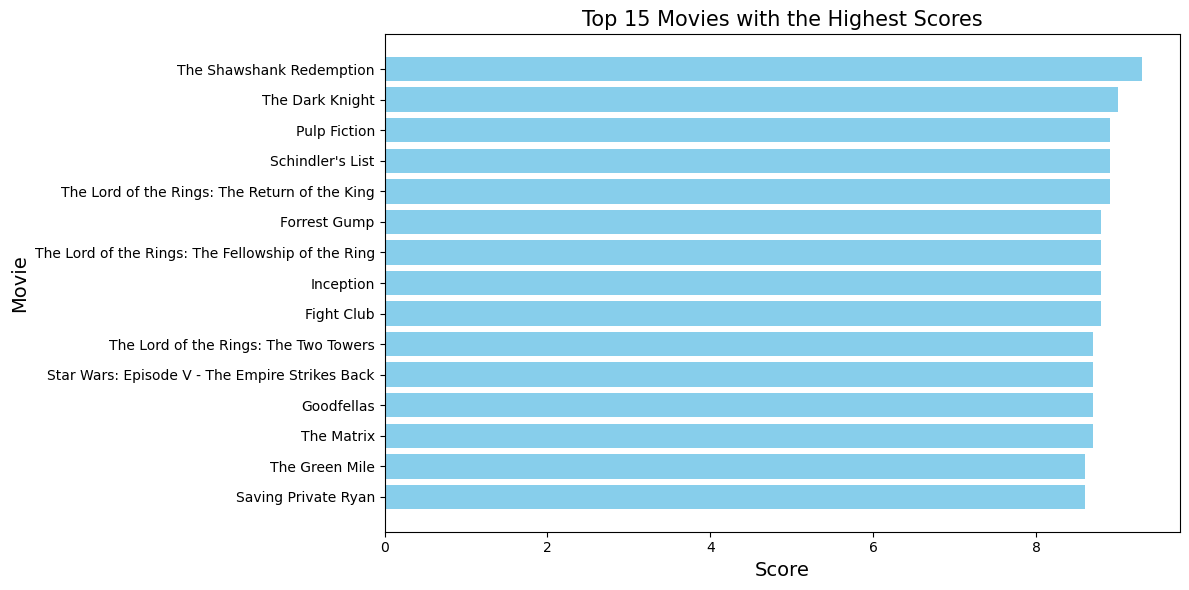

<Figure size 640x480 with 0 Axes>

In [67]:
# Sort the DataFrame by 'score' column in descending order
highest_score_movies = movies.sort_values(by='score', ascending=False)

# Select the top 10 highest scoring movies
top_15_highest_score_movies = highest_score_movies.head(15)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_15_highest_score_movies['name'], top_15_highest_score_movies['score'], color ='skyblue')
plt.xlabel('Score', fontsize = 14)
plt.ylabel('Movie', fontsize = 14)
plt.title('Top 15 Movies with the Highest Scores', fontsize = 15)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.tight_layout()
plt.show()
plt.savefig('../Images/top_15_movies_with_highest_score.png', dpi = 192);

#### `The Shawshank Redemption` is the highest scored movie so far

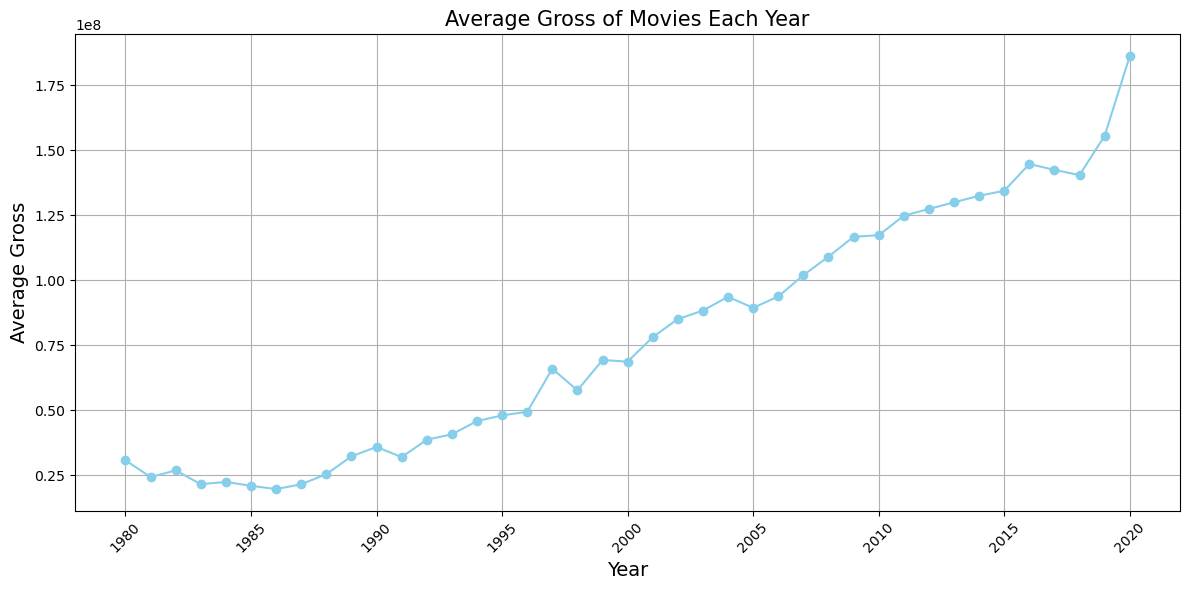

<Figure size 640x480 with 0 Axes>

In [68]:
#  average gross by year
avg_gross_per_year = movies.groupby('year')['gross'].mean()

# plotting
plt.figure(figsize=(12, 6))
plt.plot(avg_gross_per_year.index, avg_gross_per_year.values, marker='o', color='skyblue', linestyle='-')
plt.title('Average Gross of Movies Each Year', fontsize =15)
plt.xlabel('Year', fontsize =14)
plt.ylabel('Average Gross', fontsize =14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('../Images/average_goss_revnue_movies_year', dpi =192)

#### we can see the gross revenue of movie is linearly increasing so far except for 2020

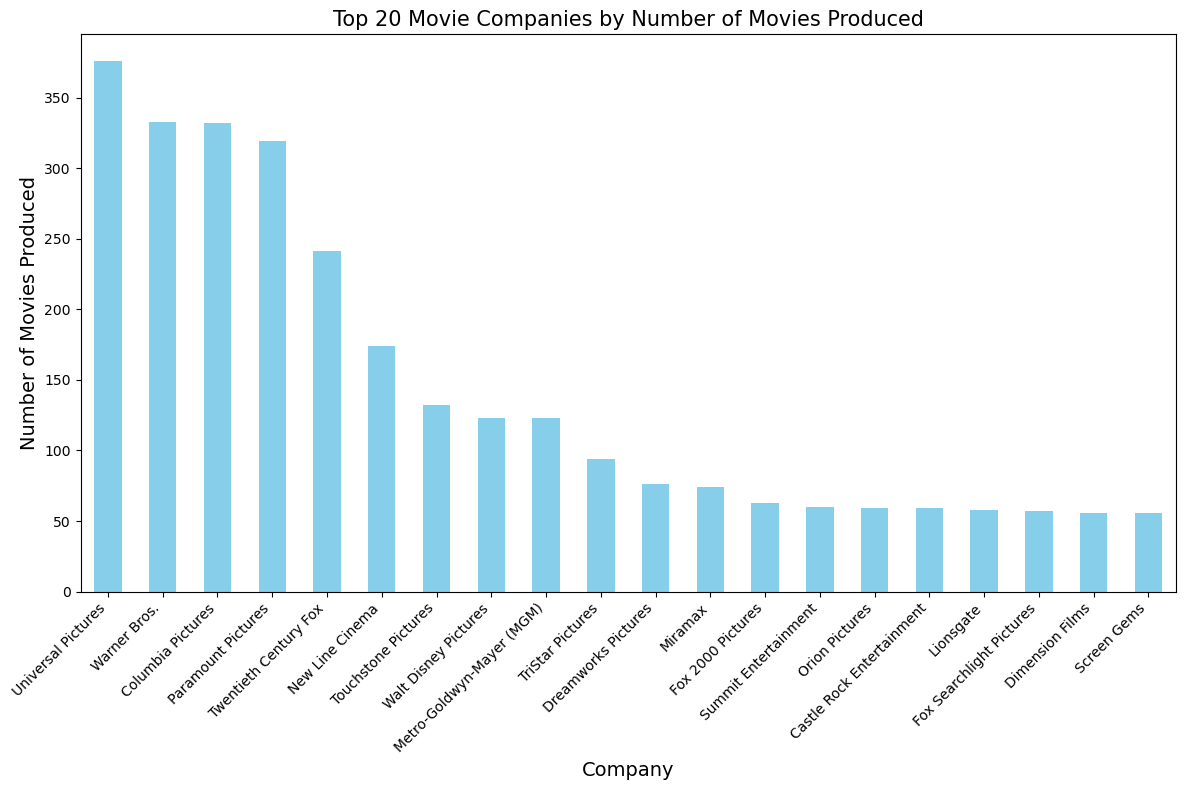

<Figure size 640x480 with 0 Axes>

In [69]:
# count the number of movies for each company
company_movie_count = movies['company'].value_counts().sort_values(ascending=False)

# Select the top 20 movie companies by number of movies produced
top_20_companies = company_movie_count.head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_20_companies.plot(kind='bar', color='skyblue')
plt.title('Top 20 Movie Companies by Number of Movies Produced', fontsize = 15)
plt.xlabel('Company', fontsize = 14)
plt.ylabel('Number of Movies Produced', fontsize = 14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('../Images/top_20_companies_by_total_movies.png', dpi = 192);

#### Universal Pictures has produced most movies so far

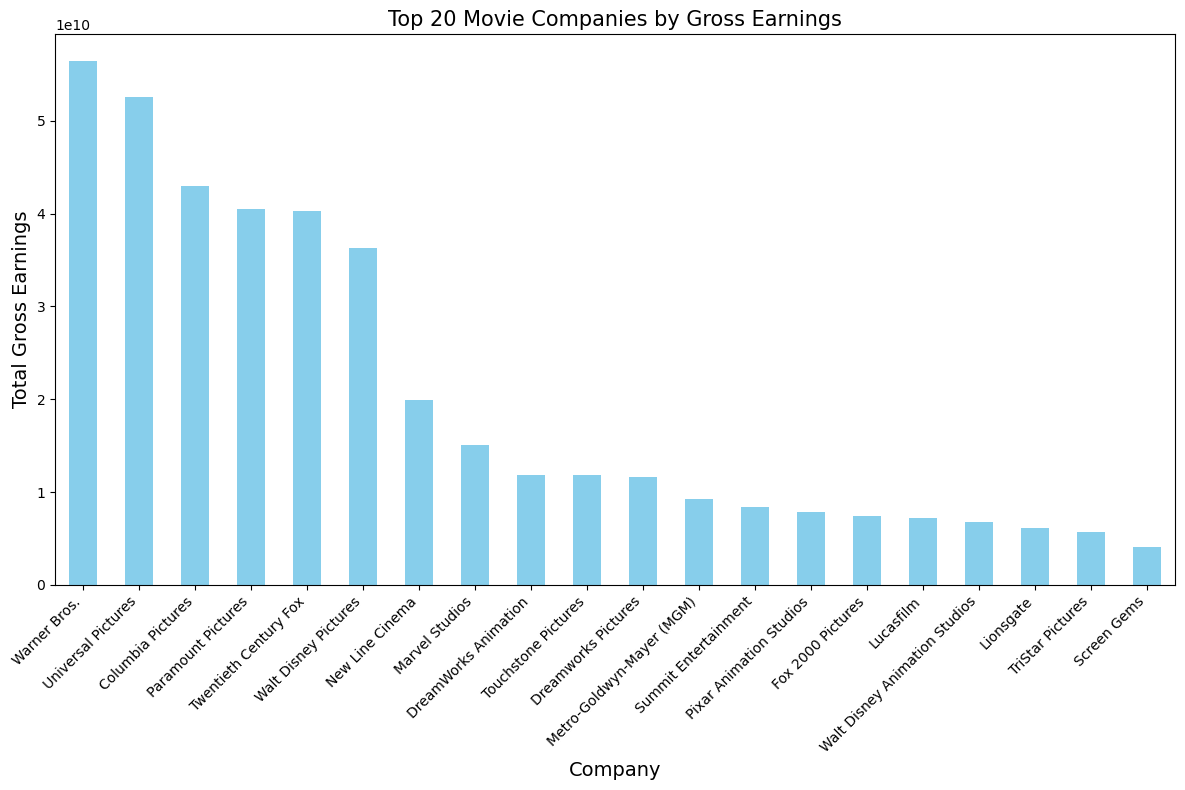

<Figure size 640x480 with 0 Axes>

In [71]:
 # calculate the total gross earnings for each company
company_gross = movies.groupby('company')['gross'].sum().sort_values(ascending=False)

# Select the top 20 movie companies by gross earnings
top_20_companies = company_gross.head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_20_companies.plot(kind='bar', color='skyblue')
plt.title('Top 20 Movie Companies by Gross Earnings', fontsize = 15)
plt.xlabel('Company', fontsize = 14)
plt.ylabel('Total Gross Earnings', fontsize = 14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();
plt.savefig('../Images/top_20_companies_by_gross_earinings.png', dpi = 192);

#### Warner Bros. is the number one most earning company

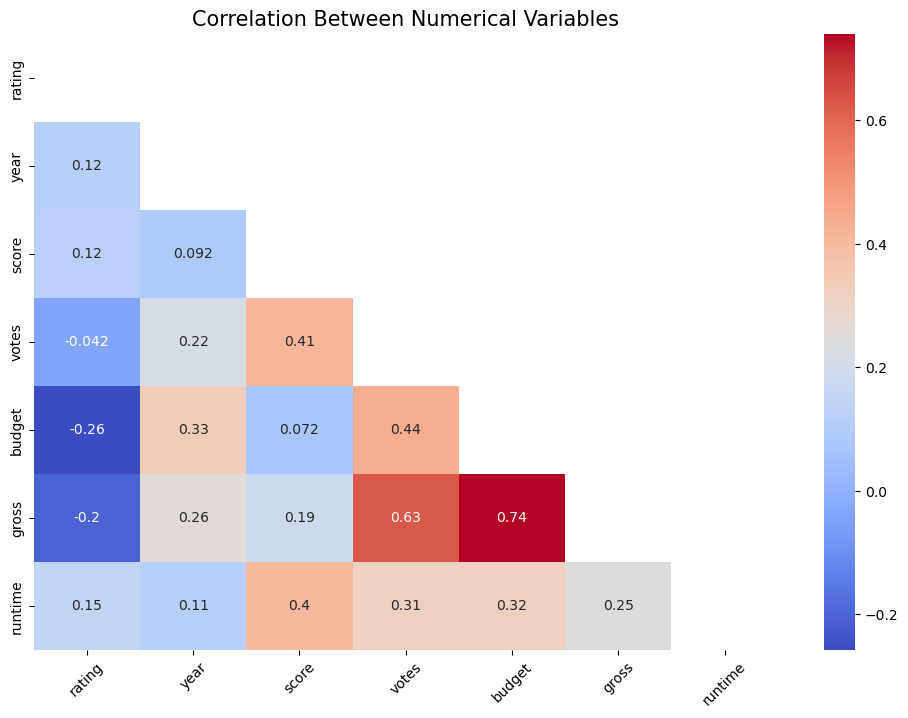

<Figure size 640x480 with 0 Axes>

In [72]:
# Correlation between different numerical variables

corr = movies.corr(numeric_only =True)

plt.figure(figsize=(12, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr
            , annot = True
            , cmap = 'coolwarm'
             , mask = mask);
plt.title('Correlation Between Numerical Variables', fontsize = 15)
plt.xticks(rotation=45)
plt.show()
plt.savefig('../Images/Correlation_between_Features.png', dpi = 192); 


#### We can see there is a strong correlation between budget and gross revenue. Also a high correlation betwen votes and gross revenue